In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os 
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [25]:
data = pd.read_csv("Data/smears_not_normalized.csv", index_col=0, header=[0, 1, 2]).replace(0, np.nan)
data.head(10);

In [32]:
data.isna().sum()

Condition  Acuteness  Sample  
Healthy    Healthy    iBAQ H10    11
                      iBAQ H11    11
                      iBAQ H12    65
                      iBAQ H3      5
                      iBAQ H4     21
                      iBAQ H5      3
                      iBAQ H6      9
                      iBAQ H7     51
                      iBAQ H8     66
                      iBAQ H9     22
Pneumonia  Mild       iBAQ P1     45
                      iBAQ P10    48
                      iBAQ P11    30
           Severe     iBAQ P2     27
                      iBAQ P3     19
           Mild       iBAQ P4     45
           Severe     iBAQ P5      5
                      iBAQ P6     59
           Mild       iBAQ P7     11
           Severe     iBAQ P8      2
dtype: int64

In [26]:
## MISSING VALUES IMPUTATION

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [33]:
imp = SimpleImputer(strategy='median')

fixed = imp.fit_transform(data)

In [35]:
pd.DataFrame(fixed, index=data.index, columns=data.columns).to_csv("Data/smears_imputed.csv", index=True)

In [29]:
fixed

array([[1.95500000e+08, 9.31520000e+07, 1.97302277e+07, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.04050000e+07, 2.08490000e+07, 3.47907989e+06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.19310000e+06, 4.02450000e+06, 2.47420000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.42040000e+06, 2.95493668e+06, 2.53570287e+06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70830000e+06, 6.18992384e+06, 2.35751315e+06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23590000e+06, 7.25760000e+06, 2.26181680e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [75]:
## MISSING VALUES IMPUTATION

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


imputers = {
    "simple"       : SimpleImputer(missing_values=0, strategy='median'),
    "knn"          : KNNImputer(missing_values=0, n_neighbors=5, weights="distance", add_indicator=True),
    "iterative"    : IterativeImputer(missing_values=0, max_iter=10, min_value=data.min().min()),
}


N_SPLITS = 4

from sklearn.ensemble import HistGradientBoostingClassifier
regressor = HistGradientBoostingClassifier(random_state=0)


from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = data.T.reset_index()["Acuteness"]

encoded_y = enc.fit_transform(y)

def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores.mean(), impute_scores.std()


mses = np.zeros(3)
stds = np.zeros(3)


x_labels = []

for idx, (name, imputer) in enumerate(imputers.items()):
    
    mses[idx], stds[idx] = get_scores_for_imputer(imputer, data.T.dropna().values, encoded_y)
    x_labels.append(name)
    
    
    # fixed = imputer.transform(data)
    # fixed = pd.DataFrame(fixed, index=data.index, columns=data.columns)
    
    
#     from sklearn.decomposition import PCA

#     pca_input = np.log10(fixed.T + 1)
#     pca_index = pca_input.reset_index()["Sample"]
#     pca_columns = [F"PC {i}" for i in range(1, pca.n_components + 1)]

#     xpca = PCA(n_components=3).fit_transform(pca_input)
#     x_pca = pd.DataFrame(xpca, index=pca_index, columns=pca_columns)
#     x_pca["Condition"] = pca_input.reset_index()["Acuteness"].values

#     import seaborn as sns

#     fig = plt.figure(figsize=(7.5, 7.5))
#     g = sns.pairplot(x_pca, hue="Condition", palette=["green", "blue", "orange"], corner=True)
#     g.map_lower(sns.kdeplot, levels=1, color=".05")
    

from statsmodels.stats.multitest import multipletests as fdr
from scipy import stats

# data = data.apply(stats.zscore)

# tuples = [("Bob" if i in [11, 12, 13, 14] else "Alice", i) for i in data.index]
# data.index = pd.MultiIndex.from_tuples(tuples, names=["Person", "Sample"])

# dataframe = pd.DataFrame([stats.mannwhitneyu(values["Alice"], values["Bob"]) for protein, values in data.T.iterrows()], index=data.T.index)
# dataframe["fdr"] = fdr(dataframe["pvalue"], method="fdr_bh")[1]

# data

/home/tools/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/tools/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/tools/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([0.28865642, 0.33699726, 0.31704395, 0.        ])

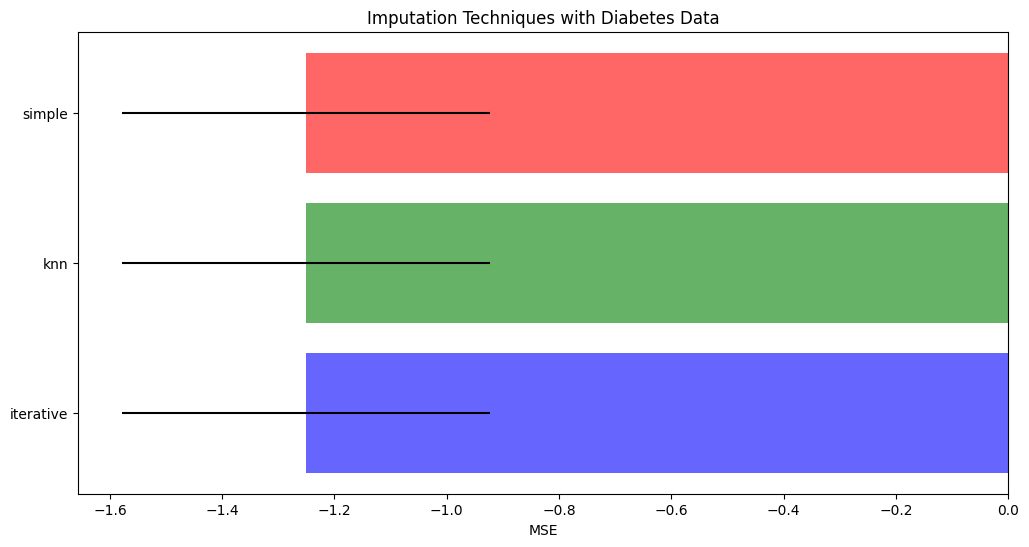

In [76]:
import matplotlib.pyplot as plt

n_bars = len(mses)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "orange", "black"]

# plot diabetes results
plt.figure(figsize=(12, 6))

ax = plt.subplot()
for j in xval:
    ax.barh(
        j,
        mses[j],
        xerr=stds[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax.set_title("Imputation Techniques with Diabetes Data")
# ax.set_xlim(left=np.min(mses) * 0.9, right=np.max(mses) * 1.1)
ax.set_yticks(xval)
ax.set_xlabel("MSE")
ax.invert_yaxis()
ax.set_yticklabels(x_labels)

plt.show()

In [69]:
data.to_csv("Data/smears_imputed.csv", index=True)

<Figure size 750x750 with 0 Axes>

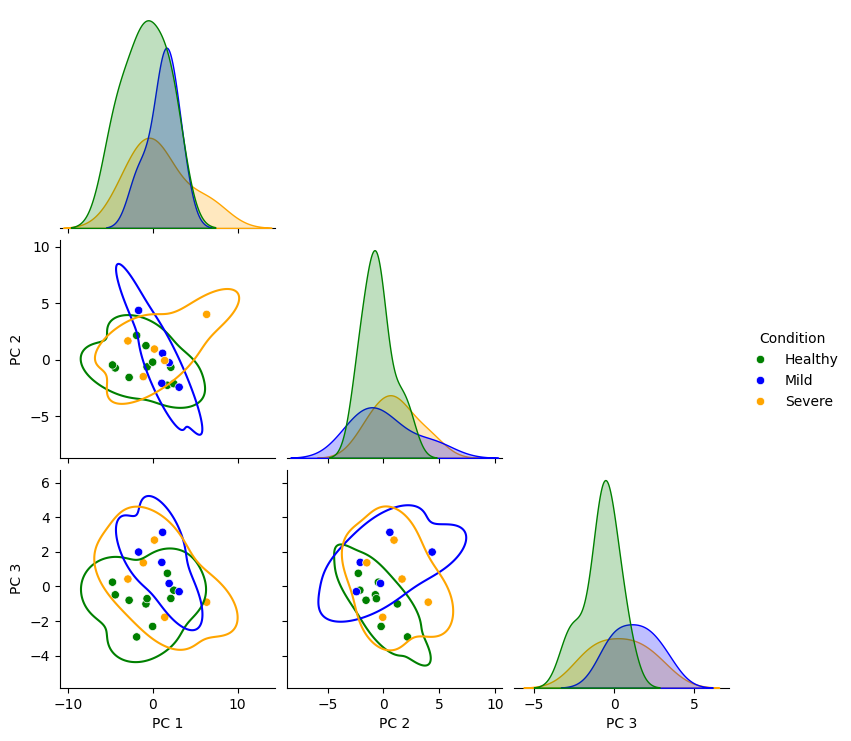

In [71]:
from sklearn.decomposition import PCA

pca_input = np.log10(fixed.T + 1)
pca_index = pca_input.reset_index()["Sample"]
pca_columns = [F"PC {i}" for i in range(1, pca.n_components + 1)]

xpca = PCA(n_components=3).fit_transform(pca_input)
x_pca = pd.DataFrame(xpca, index=pca_index, columns=pca_columns)
x_pca["Condition"] = pca_input.reset_index()["Acuteness"].values

import seaborn as sns

fig = plt.figure(figsize=(7.5, 7.5))

g = sns.pairplot(x_pca, hue="Condition", palette=["green", "blue", "orange"], corner=True)
g.map_lower(sns.kdeplot, levels=1, color=".05")